In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np


In [2]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

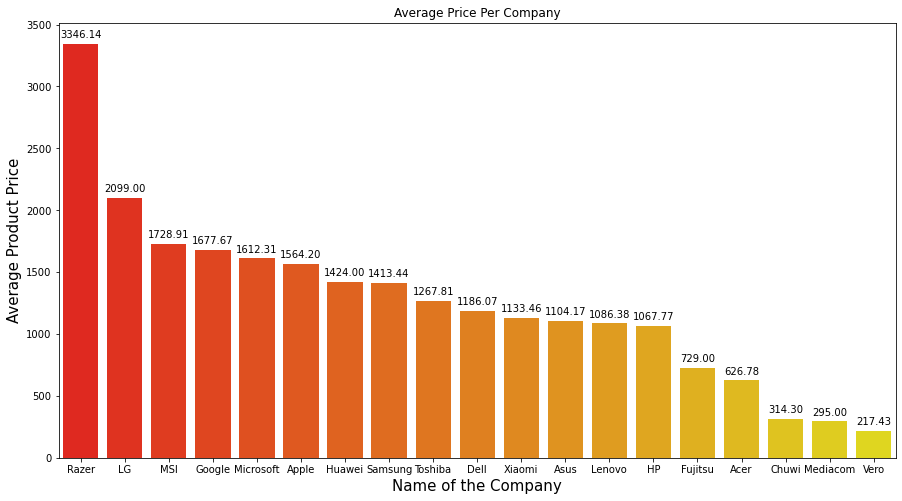

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [14]:
df.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 106
OpSys                 9
Weight              171
Price_euros         791
dtype: int64

In [15]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


# Seperate x and y

In [16]:
x = df.drop('Price_euros',axis= 'columns')

In [17]:
y = df['Price_euros']

In [18]:
x['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

# Preprocessing

In [19]:
mem = x[['storage_size','storage_device_type']] = x['Memory'].str.split(" ", n=1, expand=True) # Split Memory column to storage_size and storage_device_type

In [20]:
mem

,0,1
0,128GB,SSD
1,128GB,Flash Storage
2,256GB,SSD
3,512GB,SSD
4,256GB,SSD
...,...,...
1298,128GB,SSD
1299,512GB,SSD
1300,64GB,Flash Storage
1301,1TB,HDD


In [21]:
x.storage_size.unique()


array(['128GB', '256GB', '512GB', '500GB', '1TB', '32GB', '64GB', '2TB',
       '1.0TB', '16GB', '180GB', '240GB', '8GB', '508GB'], dtype=object)

In [22]:
x.storage_device_type.unique()


array(['SSD', 'Flash Storage', 'HDD', 'SSD +  1TB HDD',
       'SSD +  256GB SSD', 'SSD +  2TB HDD', 'Hybrid', 'SSD +  500GB HDD',
       'SSD +  512GB SSD', 'Flash Storage +  1TB HDD', 'HDD +  1TB HDD',
       'SSD +  1.0TB Hybrid'], dtype=object)

In [23]:
l=list(x['storage_size']) # make a list for iterate

In [24]:
l

['128GB',
 '128GB',
 '256GB',
 '512GB',
 '256GB',
 '500GB',
 '256GB',
 '256GB',
 '512GB',
 '256GB',
 '500GB',
 '500GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '512GB',
 '1TB',
 '128GB',
 '32GB',
 '128GB',
 '500GB',
 '256GB',
 '256GB',
 '1TB',
 '128GB',
 '256GB',
 '256GB',
 '1TB',
 '64GB',
 '32GB',
 '500GB',
 '512GB',
 '256GB',
 '64GB',
 '1TB',
 '128GB',
 '1TB',
 '256GB',
 '1TB',
 '256GB',
 '1TB',
 '256GB',
 '1TB',
 '256GB',
 '128GB',
 '256GB',
 '256GB',
 '1TB',
 '64GB',
 '256GB',
 '256GB',
 '512GB',
 '1TB',
 '256GB',
 '128GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '256GB',
 '512GB',
 '500GB',
 '32GB',
 '1TB',
 '1TB',
 '128GB',
 '256GB',
 '256GB',
 '128GB',
 '1TB',
 '1TB',
 '2TB',
 '128GB',
 '1TB',
 '128GB',
 '256GB',
 '512GB',
 '256GB',
 '128GB',
 '1TB',
 '128GB',
 '256GB',
 '256GB',
 '128GB',
 '256GB',
 '1TB',
 '1TB',
 '512GB',
 '256GB',
 '256GB',
 '256GB',
 '1TB',
 '256GB',
 '256GB',
 '128GB',
 '256GB',
 '500GB',
 '1TB',
 '256GB',
 '256GB'

In [25]:
storage=[float((i.replace("GB",""))) 
         if 'GB' in i 
         else float((i.replace("TB","")))*1000 for i in l]

In [26]:
storage

[128.0,
 128.0,
 256.0,
 512.0,
 256.0,
 500.0,
 256.0,
 256.0,
 512.0,
 256.0,
 500.0,
 500.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 512.0,
 1000.0,
 128.0,
 32.0,
 128.0,
 500.0,
 256.0,
 256.0,
 1000.0,
 128.0,
 256.0,
 256.0,
 1000.0,
 64.0,
 32.0,
 500.0,
 512.0,
 256.0,
 64.0,
 1000.0,
 128.0,
 1000.0,
 256.0,
 1000.0,
 256.0,
 1000.0,
 256.0,
 1000.0,
 256.0,
 128.0,
 256.0,
 256.0,
 1000.0,
 64.0,
 256.0,
 256.0,
 512.0,
 1000.0,
 256.0,
 128.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 512.0,
 500.0,
 32.0,
 1000.0,
 1000.0,
 128.0,
 256.0,
 256.0,
 128.0,
 1000.0,
 1000.0,
 2000.0,
 128.0,
 1000.0,
 128.0,
 256.0,
 512.0,
 256.0,
 128.0,
 1000.0,
 128.0,
 256.0,
 256.0,
 128.0,
 256.0,
 1000.0,
 1000.0,
 512.0,
 256.0,
 256.0,
 256.0,
 1000.0,
 256.0,
 256.0,
 128.0,
 256.0,
 500.0,
 1000.0,
 256.0,
 256.0,
 256.0,
 1000.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 256.0,
 500.0,
 256.0,
 256.0,
 512.0,
 256.0,
 1000.0,
 256.0,
 1000.0,
 256.0,
 256.0

In [27]:
storage_size_gb=pd.DataFrame(data=storage,columns=['storage_size_gb']) # make Dataframe

In [28]:
storage_size_gb

,storage_size_gb
0,128.0
1,128.0
2,256.0
3,512.0
4,256.0
...,...
1298,128.0
1299,512.0
1300,64.0
1301,1000.0


In [29]:
x['storage_size_gb']=storage_size_gb # Add column with x

In [30]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,storage_size,storage_device_type,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,128GB,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,128GB,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,256GB,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,512GB,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,256GB,SSD,256.0


In [31]:
x.drop('storage_device_type',axis= 'columns',inplace= True)

In [32]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,storage_size,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,128GB,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,128GB,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,256GB,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,512GB,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,256GB,256.0


In [33]:
x.drop('storage_size',axis= 'columns',inplace= True)

In [34]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,256.0


In [35]:
x.drop('Memory',axis= 'columns',inplace= True)

In [36]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,storage_size_gb
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0


In [37]:
x.rename(columns={'storage_size_gb': 'Memory'}, inplace= True) #column rename

In [38]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0


In [39]:
x[['screen','screen_resoluton_height']] = x['ScreenResolution'].str.rsplit('x',expand=True) # split from 'x'

In [40]:
x[['screen','screen_resoluton_height']]

,screen,screen_resoluton_height
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [41]:
x[["screen_type", "sep","screen_resoluton_width"]] = x["screen"].str.split("(\d\d)", n=1, expand=True)
x["screen_resoluton_width"] = x["sep"] + x["screen_resoluton_width"]
x.drop("sep", inplace=True, axis=1)

In [42]:
x["screen_resoluton_width"]

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: screen_resoluton_width, Length: 1303, dtype: object

In [43]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory,screen,screen_resoluton_height,screen_type,screen_resoluton_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0,1440,900,,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0,Full HD 1920,1080,Full HD,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560


In [44]:
x.drop('screen_type',axis= 'columns',inplace= True)

In [45]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory,screen,screen_resoluton_height,screen_resoluton_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0,IPS Panel Retina Display 2560,1600,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0,1440,900,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0,Full HD 1920,1080,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0,IPS Panel Retina Display 2880,1800,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0,IPS Panel Retina Display 2560,1600,2560


In [46]:
x.drop('screen',axis= 'columns',inplace= True)

In [47]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0,1600,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0,900,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0,1080,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0,1800,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0,1600,2560


In [48]:
x[["graphics_processing_type", "sep","graphics_processing_unit"]] = x["Gpu"].str.split("(\d\d)", n=1, expand=True)
x["graphics_processing_unit"] = x["sep"] + x["graphics_processing_unit"]
x.drop("sep", inplace=True, axis=1)

In [49]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_type,graphics_processing_unit
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0,1600,2560,Intel Iris Plus Graphics,640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0,900,1440,Intel HD Graphics,6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0,1080,1920,Intel HD Graphics,620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0,1800,2880,AMD Radeon Pro,455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0,1600,2560,Intel Iris Plus Graphics,650


In [50]:
x.drop('graphics_processing_type',axis= 'columns',inplace= True)

In [51]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,128.0,1600,2560,640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,128.0,900,1440,6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,256.0,1080,1920,620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,512.0,1800,2880,455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,256.0,1600,2560,650


In [52]:
x.drop('Gpu',axis= 'columns',inplace= True)

In [53]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,macOS,1.37,128.0,1600,2560,640
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,macOS,1.34,128.0,900,1440,6000
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,256.0,1080,1920,620
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,macOS,1.83,512.0,1800,2880,455
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,macOS,1.37,256.0,1600,2560,650


In [54]:
x[['central_processing_type','central_processing_unit']] = x['Cpu'].str.rsplit(" ", n=1, expand=True) # Split Memory column to storage_size and storage_device_type

In [55]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit,central_processing_type,central_processing_unit
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,macOS,1.37,128.0,1600,2560,640,Intel Core i5,2.3GHz
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,macOS,1.34,128.0,900,1440,6000,Intel Core i5,1.8GHz
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,256.0,1080,1920,620,Intel Core i5 7200U,2.5GHz
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,macOS,1.83,512.0,1800,2880,455,Intel Core i7,2.7GHz
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,macOS,1.37,256.0,1600,2560,650,Intel Core i5,3.1GHz


In [56]:
x.central_processing_unit.unique()


array(['2.3GHz', '1.8GHz', '2.5GHz', '2.7GHz', '3.1GHz', '3GHz', '2.2GHz',
       '1.6GHz', '2GHz', '2.8GHz', '1.2GHz', '2.9GHz', '2.4GHz',
       '1.44GHz', '1.5GHz', '1.9GHz', '1.1GHz', '2.0GHz', '1.3GHz',
       '2.6GHz', '3.6GHz', '1.60GHz', '3.2GHz', '1.0GHz', '2.1GHz',
       '0.9GHz', '1.92GHz', '2.50GHz', '2.70GHz'], dtype=object)

In [57]:
l1=list(x['central_processing_unit']) # make a list for iterate

In [58]:
l1

['2.3GHz',
 '1.8GHz',
 '2.5GHz',
 '2.7GHz',
 '3.1GHz',
 '3GHz',
 '2.2GHz',
 '1.8GHz',
 '1.8GHz',
 '1.6GHz',
 '2.5GHz',
 '2GHz',
 '2.8GHz',
 '2GHz',
 '1.2GHz',
 '2.3GHz',
 '2.7GHz',
 '2.9GHz',
 '2.4GHz',
 '1.6GHz',
 '1.44GHz',
 '2.5GHz',
 '1.5GHz',
 '1.6GHz',
 '1.8GHz',
 '2GHz',
 '1.6GHz',
 '1.6GHz',
 '1.9GHz',
 '1.6GHz',
 '1.44GHz',
 '1.5GHz',
 '2.5GHz',
 '1.8GHz',
 '1.6GHz',
 '1.1GHz',
 '2.7GHz',
 '1.6GHz',
 '2.5GHz',
 '1.6GHz',
 '2GHz',
 '2.8GHz',
 '2.5GHz',
 '1.6GHz',
 '1.6GHz',
 '2.0GHz',
 '2GHz',
 '3GHz',
 '2.5GHz',
 '1.1GHz',
 '1.44GHz',
 '1.8GHz',
 '2.5GHz',
 '1.8GHz',
 '2.4GHz',
 '1.8GHz',
 '2GHz',
 '2.5GHz',
 '2.8GHz',
 '2GHz',
 '1.8GHz',
 '1.6GHz',
 '2.7GHz',
 '1.6GHz',
 '2.5GHz',
 '2.8GHz',
 '2GHz',
 '1.6GHz',
 '2.5GHz',
 '2.8GHz',
 '2.5GHz',
 '1.8GHz',
 '1.8GHz',
 '2.5GHz',
 '2GHz',
 '2.8GHz',
 '2.5GHz',
 '1.8GHz',
 '2.7GHz',
 '1.6GHz',
 '1.6GHz',
 '1.3GHz',
 '1.6GHz',
 '2.5GHz',
 '3GHz',
 '2.8GHz',
 '1.8GHz',
 '2.5GHz',
 '2.8GHz',
 '1.8GHz',
 '3GHz',
 '1.8GHz',
 '1.8GHz',


In [59]:
unit=[float((i.replace("GHz",""))) 
         if 'GHz' in i 
         else float((i.replace("GHz",""))) for i in l1]

In [60]:
unit

[2.3,
 1.8,
 2.5,
 2.7,
 3.1,
 3.0,
 2.2,
 1.8,
 1.8,
 1.6,
 2.5,
 2.0,
 2.8,
 2.0,
 1.2,
 2.3,
 2.7,
 2.9,
 2.4,
 1.6,
 1.44,
 2.5,
 1.5,
 1.6,
 1.8,
 2.0,
 1.6,
 1.6,
 1.9,
 1.6,
 1.44,
 1.5,
 2.5,
 1.8,
 1.6,
 1.1,
 2.7,
 1.6,
 2.5,
 1.6,
 2.0,
 2.8,
 2.5,
 1.6,
 1.6,
 2.0,
 2.0,
 3.0,
 2.5,
 1.1,
 1.44,
 1.8,
 2.5,
 1.8,
 2.4,
 1.8,
 2.0,
 2.5,
 2.8,
 2.0,
 1.8,
 1.6,
 2.7,
 1.6,
 2.5,
 2.8,
 2.0,
 1.6,
 2.5,
 2.8,
 2.5,
 1.8,
 1.8,
 2.5,
 2.0,
 2.8,
 2.5,
 1.8,
 2.7,
 1.6,
 1.6,
 1.3,
 1.6,
 2.5,
 3.0,
 2.8,
 1.8,
 2.5,
 2.8,
 1.8,
 3.0,
 1.8,
 1.8,
 2.5,
 2.7,
 1.6,
 2.7,
 2.0,
 2.4,
 2.8,
 2.7,
 1.5,
 1.6,
 2.7,
 2.5,
 2.5,
 2.0,
 2.7,
 2.8,
 2.7,
 1.8,
 2.4,
 2.5,
 1.6,
 1.6,
 1.6,
 1.8,
 1.8,
 2.0,
 1.8,
 2.4,
 2.8,
 2.5,
 1.8,
 3.0,
 1.6,
 1.6,
 1.5,
 1.8,
 1.6,
 2.5,
 2.0,
 1.8,
 2.7,
 2.7,
 1.8,
 1.1,
 2.5,
 2.5,
 2.5,
 2.7,
 1.6,
 2.8,
 2.3,
 2.5,
 1.8,
 1.2,
 1.1,
 2.8,
 2.0,
 2.8,
 2.8,
 2.5,
 2.8,
 2.7,
 1.6,
 2.4,
 1.6,
 1.8,
 2.2,
 3.0,
 1.6,
 1.6,
 2.8,
 1.1,
 2.8,
 

In [61]:
central_unit=pd.DataFrame(data=unit,columns=['central_unit']) # make Dataframe

In [62]:
central_unit

,central_unit
0,2.3
1,1.8
2,2.5
3,2.7
4,3.1
...,...
1298,2.5
1299,2.5
1300,1.6
1301,2.5


In [63]:
x['central_unit']=central_unit # Add column with x

In [64]:
x.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit,central_processing_type,central_processing_unit,central_unit
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,macOS,1.37,128.0,1600,2560,640,Intel Core i5,2.3GHz,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,macOS,1.34,128.0,900,1440,6000,Intel Core i5,1.8GHz,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,256.0,1080,1920,620,Intel Core i5 7200U,2.5GHz,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,macOS,1.83,512.0,1800,2880,455,Intel Core i7,2.7GHz,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,macOS,1.37,256.0,1600,2560,650,Intel Core i5,3.1GHz,3.1


In [65]:
x.drop('central_processing_unit',axis= 'columns',inplace= True)

In [66]:
x.drop('central_processing_type',axis= 'columns',inplace= True)

In [67]:
x.drop('Cpu',axis= 'columns',inplace= True)

In [68]:
x.drop('ScreenResolution',axis= 'columns',inplace= True)

In [69]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit,central_unit
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,128.0,1600,2560,640,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,128.0,900,1440,6000,1.8
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,256.0,1080,1920,620,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,512.0,1800,2880,455,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,256.0,1600,2560,650,3.1


In [70]:
x.rename(columns={'central_unit': 'CPU'}, inplace= True) #column rename

In [71]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,graphics_processing_unit,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,128.0,1600,2560,640,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,128.0,900,1440,6000,1.8
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,256.0,1080,1920,620,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,512.0,1800,2880,455,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,256.0,1600,2560,650,3.1


In [72]:
x.rename(columns={'graphics_processing_unit': 'GPU'}, inplace= True) #column rename

# After Preprocessing 

In [73]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,128.0,1600,2560,640,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,128.0,900,1440,6000,1.8
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,256.0,1080,1920,620,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,512.0,1800,2880,455,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,256.0,1600,2560,650,3.1


# Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
x.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Memory', 'screen_resoluton_height', 'screen_resoluton_width', 'GPU',
       'CPU'],
      dtype='object')

In [76]:
le = LabelEncoder()

In [77]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,128.0,1600,2560,640,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,128.0,900,1440,6000,1.8
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,256.0,1080,1920,620,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,512.0,1800,2880,455,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,256.0,1600,2560,650,3.1


In [78]:
import warnings
warnings.filterwarnings('ignore')

for col in x.columns:
    if x[col].dtype == np.number:
        continue
    else:
        x[col] = le.fit_transform(x[col])

In [79]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,1,300,4,13.3,3,8,1.37,128.0,4,8,55,2.3
1,1,301,4,13.3,3,8,1.34,128.0,9,1,49,1.8
2,7,50,3,15.6,3,4,1.86,256.0,0,3,52,2.5
3,1,300,4,15.4,5,8,1.83,512.0,5,10,31,2.7
4,1,300,4,13.3,3,8,1.37,256.0,4,8,56,3.1


# Normalization

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
 x['Company'] = scaler.fit_transform(x[['Company']])

In [82]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,300,4,13.3,3,8,1.37,128.0,4,8,55,2.3
1,0.055556,301,4,13.3,3,8,1.34,128.0,9,1,49,1.8
2,0.388889,50,3,15.6,3,4,1.86,256.0,0,3,52,2.5
3,0.055556,300,4,15.4,5,8,1.83,512.0,5,10,31,2.7
4,0.055556,300,4,13.3,3,8,1.37,256.0,4,8,56,3.1


In [83]:
 x['Product'] = scaler.fit_transform(x[['Product']])

In [84]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,4,13.3,3,8,1.37,128.0,4,8,55,2.3
1,0.055556,0.487844,4,13.3,3,8,1.34,128.0,9,1,49,1.8
2,0.388889,0.081037,3,15.6,3,4,1.86,256.0,0,3,52,2.5
3,0.055556,0.486224,4,15.4,5,8,1.83,512.0,5,10,31,2.7
4,0.055556,0.486224,4,13.3,3,8,1.37,256.0,4,8,56,3.1


In [85]:
 x['TypeName'] = scaler.fit_transform(x[['TypeName']])

In [86]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,13.3,3,8,1.37,128.0,4,8,55,2.3
1,0.055556,0.487844,0.8,13.3,3,8,1.34,128.0,9,1,49,1.8
2,0.388889,0.081037,0.6,15.6,3,4,1.86,256.0,0,3,52,2.5
3,0.055556,0.486224,0.8,15.4,5,8,1.83,512.0,5,10,31,2.7
4,0.055556,0.486224,0.8,13.3,3,8,1.37,256.0,4,8,56,3.1


In [87]:
 x['Inches'] = scaler.fit_transform(x[['Inches']])

In [88]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,3,8,1.37,128.0,4,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,3,8,1.34,128.0,9,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,3,4,1.86,256.0,0,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,5,8,1.83,512.0,5,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,3,8,1.37,256.0,4,8,56,3.1


In [89]:
 x['Ram'] = scaler.fit_transform(x[['Ram']])

In [90]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,8,1.37,128.0,4,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,8,1.34,128.0,9,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,4,1.86,256.0,0,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,8,1.83,512.0,5,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,8,1.37,256.0,4,8,56,3.1


In [91]:
 x['OpSys'] = scaler.fit_transform(x[['OpSys']])

In [92]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,1.37,128.0,4,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,1.34,128.0,9,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,1.86,256.0,0,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,1.83,512.0,5,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,1.37,256.0,4,8,56,3.1


In [93]:
 x['Weight'] = scaler.fit_transform(x[['Weight']])

In [94]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,128.0,4,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,128.0,9,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,256.0,0,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,512.0,5,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,256.0,4,8,56,3.1


In [95]:
 x['Memory'] = scaler.fit_transform(x[['Memory']])

In [96]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.060241,4,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,0.060241,9,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,0.124498,0,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,0.253012,5,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.124498,4,8,56,3.1


In [97]:
 x['screen_resoluton_height'] = scaler.fit_transform(x[['screen_resoluton_height']])

In [98]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.060241,0.444444,8,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,0.060241,1.000000,1,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,0.124498,0.000000,3,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,0.253012,0.555556,10,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.124498,0.444444,8,56,3.1


In [99]:
 x['screen_resoluton_width'] = scaler.fit_transform(x[['screen_resoluton_width']])

In [100]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.060241,0.444444,0.666667,55,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,0.060241,1.000000,0.083333,49,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,0.124498,0.000000,0.250000,52,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,0.253012,0.555556,0.833333,31,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.124498,0.444444,0.666667,56,3.1


In [101]:
 x['GPU'] = scaler.fit_transform(x[['GPU']])

In [102]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.060241,0.444444,0.666667,0.743243,2.3
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,0.060241,1.000000,0.083333,0.662162,1.8
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,0.124498,0.000000,0.250000,0.702703,2.5
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,0.253012,0.555556,0.833333,0.418919,2.7
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.124498,0.444444,0.666667,0.756757,3.1


In [103]:
 x['CPU'] = scaler.fit_transform(x[['CPU']])

In [104]:
x.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
0,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.060241,0.444444,0.666667,0.743243,0.518519
1,0.055556,0.487844,0.8,0.385542,0.375,1.0,0.162095,0.060241,1.000000,0.083333,0.662162,0.333333
2,0.388889,0.081037,0.6,0.662651,0.375,0.5,0.291771,0.124498,0.000000,0.250000,0.702703,0.592593
3,0.055556,0.486224,0.8,0.638554,0.625,1.0,0.284289,0.253012,0.555556,0.833333,0.418919,0.666667
4,0.055556,0.486224,0.8,0.385542,0.375,1.0,0.169576,0.124498,0.444444,0.666667,0.756757,0.814815


In [105]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

# Split the dataset into train and test

In [106]:
from sklearn.model_selection import train_test_split as tts #randomly value create store

In [107]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state = 23)

In [108]:
xtrain.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Memory,screen_resoluton_height,screen_resoluton_width,GPU,CPU
942,0.000000,0.807131,0.6,0.662651,0.125,0.625,0.384040,0.246988,0.888889,0.00,0.702703,0.592593
114,0.222222,0.933549,0.8,0.385542,0.375,0.625,0.129676,0.124498,0.000000,0.25,0.702703,0.259259
835,0.222222,0.089141,0.2,0.662651,0.625,0.625,0.628429,0.124498,0.000000,0.25,0.081081,0.703704
330,0.611111,0.265802,0.2,0.867470,0.375,0.625,0.501247,0.124498,0.000000,0.25,0.027027,0.703704
707,0.555556,0.750405,1.0,0.662651,0.625,0.875,0.371571,0.253012,0.000000,0.25,0.554054,0.592593


In [109]:
ytrain.head()

942     619.00
114    1629.00
835    2774.63
330    1199.00
707    1855.00
Name: Price_euros, dtype: float64

# Linear Regression

In [110]:
df1 = df.copy() #Linear Regression

In [111]:
df2 = df.copy() #

In [112]:
df3 = df.copy()

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
reg = LinearRegression() #create object

In [115]:
reg.fit(xtrain, ytrain) #traning all calculation

LinearRegression()

In [116]:
pred = reg.predict(xtest)

In [117]:
pred

array([ 1.11432944e+03,  3.08133291e+02,  1.08557421e+03,  9.39935708e+02,
        4.28826112e+02,  2.28824805e+00,  1.82559538e+03,  1.91613701e+03,
        1.63351038e+03,  3.46231950e+02,  1.56513563e+03,  1.33042738e+03,
        5.84792378e+02,  3.75428337e+02,  1.33453037e+03,  1.26061393e+03,
        7.48333967e+02,  1.24655931e+02,  1.32710958e+03,  6.04898285e+02,
        1.42889611e+03,  6.02995725e+02,  1.29236854e+03,  9.66022505e+02,
        1.41586091e+03,  9.62014238e+02,  4.80158481e+02,  1.92554909e+03,
        9.01411371e+02,  1.36251313e+03,  1.87766859e+03,  6.06152137e+02,
        1.82810370e+03,  1.71297135e+03,  9.64118205e+02,  1.20816403e+03,
        2.33313938e+03,  1.16982827e+03,  2.46236196e+03,  1.21662156e+03,
        7.50093353e+02,  1.04827909e+03,  1.91452242e+03,  9.59289785e+02,
        1.57315558e+02,  8.11799235e+02,  5.02383853e+02,  1.98389042e+03,
        1.34770709e+03,  6.08109818e+02,  1.85700901e+03,  1.42089850e+03,
        6.77156463e+02,  

In [118]:
df1 ['predicted result'] = reg.predict(x) #column create

In [119]:
df1.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,predicted result
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1833.415704
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1336.515178
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,980.700932
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2432.434139
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1977.253461


In [120]:
Linear_Regression =reg.score(xtest,ytest)
Linear_Regression

0.6884137350582

# Applying KNN Regressor:

In [121]:
from sklearn.neighbors import KNeighborsRegressor

In [122]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

In [123]:
pred1 = knn.predict(xtest)

In [124]:
df2 ['predicted result'] = knn.predict(x) #column create

In [125]:
df2.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,predicted result
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1952.204
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1154.572
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1007.200
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1952.204
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1952.204


In [126]:
knn_regressor =knn.score(xtest,ytest)
knn_regressor

0.7469494869248404

# Bar Graph

In [127]:
accuracy_df = pd.DataFrame([['LinearRegression',Linear_Regression],['knn_regressor',knn_regressor]],columns=['Algorithm Name', 'Accuracy'])

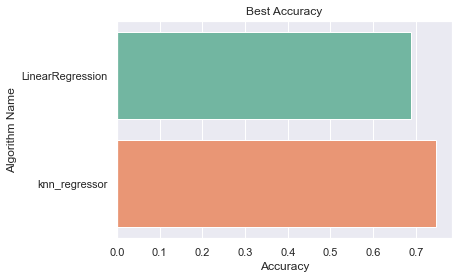

In [128]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set2").set(title='Best Accuracy')
sns.set(rc={'figure.figsize':(20,8)})